In [139]:
#Using codes 61-72

#STEP 0: IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import xgboost as XGB
import os
import string
import warnings


#STEP 2: READING CSV FILE
dset = pd.read_csv("Training Data.csv")

#STEP 3: SWITCHING TO SHAPED VERSION OF THE CSV

dset.to_csv("DIY Loan Predictor.csv")
dset = pd.read_csv("DIY Loan Predictor.csv")

#STEP 4: DROPPING UNNECESSARY COLUMNS

dset = dset.drop("Id", axis = 1)
dset = dset.drop("STATE", axis=1)
dset = dset.drop("CURRENT_HOUSE_YRS", axis = 1)
dset = dset.drop("CURRENT_JOB_YRS", axis = 1)
dset = dset.drop("Unnamed: 0", axis = 1)

#STEP 5: CHECKING FOR NULL VALUES & EXCLUDING NON-LOGICAL VALUES

dset.isnull().sum()
dset = dset[(dset['Experience'] < 40) & (dset['Experience'] > 1)]


#STEP 6: IDENTIFIYING AND HANDLING UNIQUE VALUES

dset['Married/Single'].unique()
dset['House_Ownership'].unique()
dset['Car_Ownership'].unique()
dset['Profession'].unique()
dset['CITY'].unique()



dset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229382 entries, 0 to 251999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Income           229382 non-null  int64 
 1   Age              229382 non-null  int64 
 2   Experience       229382 non-null  int64 
 3   Married/Single   229382 non-null  object
 4   House_Ownership  229382 non-null  object
 5   Car_Ownership    229382 non-null  object
 6   Profession       229382 non-null  object
 7   CITY             229382 non-null  object
 8   Risk_Flag        229382 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 17.5+ MB


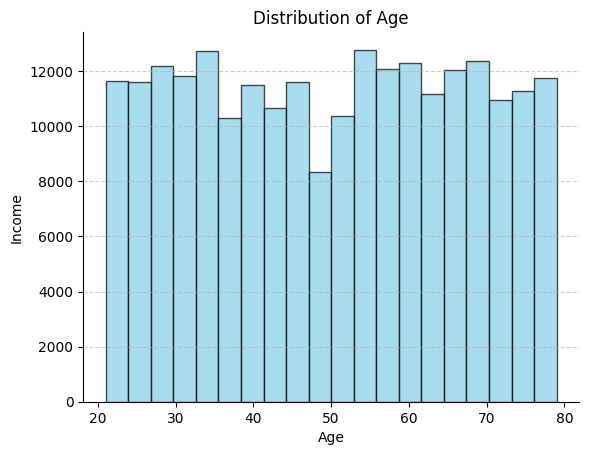

In [140]:
#STEP 7: CREATING THE AGE RANGE Income HISTOGRAM
age_data = dset['Age']  #Extract the age data

# Create the histogram with customizations
plt.hist(age_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Customize axes and labels
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Distribution of Age')

# Customize gridlines and spines
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

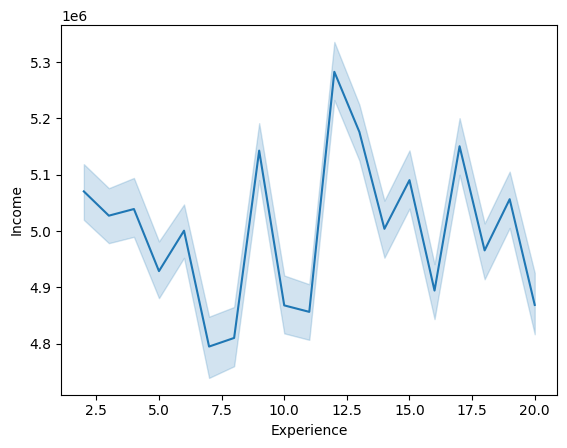

In [141]:
#STEP 8: CREATING A LINEPLOT FOR THE INCOME/EXPERIENCE RELATIONSHIP
sns.lineplot(data=dset, x="Experience", y="Income")
plt.show()

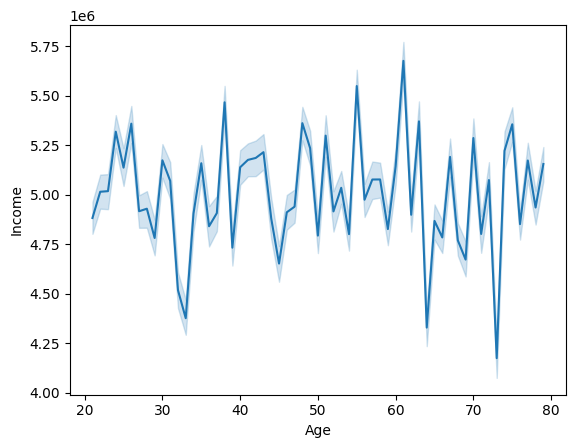

In [142]:
#STEP 9: CREATING A LINEPLOT FOR THE AGE/INCOME RELATIONSHIP
sns.lineplot(data=dset, x="Age", y="Income")
plt.show()

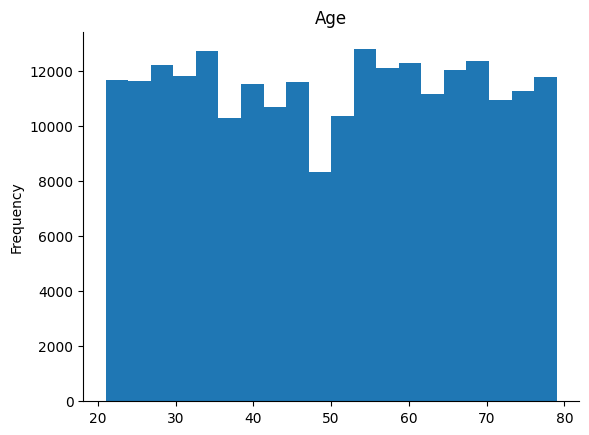

In [143]:
#STEP 10: CREATING A PLOT FOR THE AGE FREQUENCY
dset['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

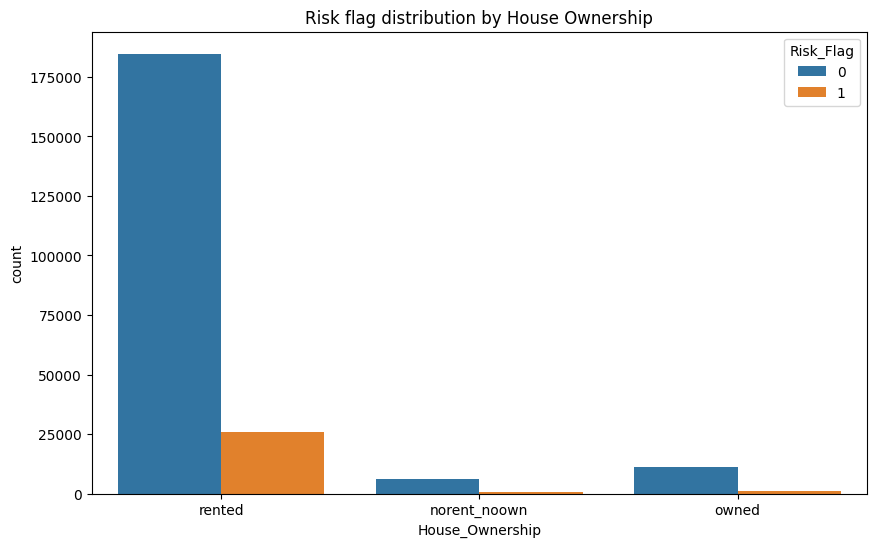

In [144]:
# STEP 11: CREATING A COUNT PLOT FOR THE RISK FLAG/HOUSE OWNERSHIP RELATIONSHIP
plt.figure(figsize=(10, 6))
sns.countplot(x="House_Ownership", hue="Risk_Flag", data=dset)
plt.title("Risk flag distribution by House Ownership")
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Car_Ownership', ylabel='count'>

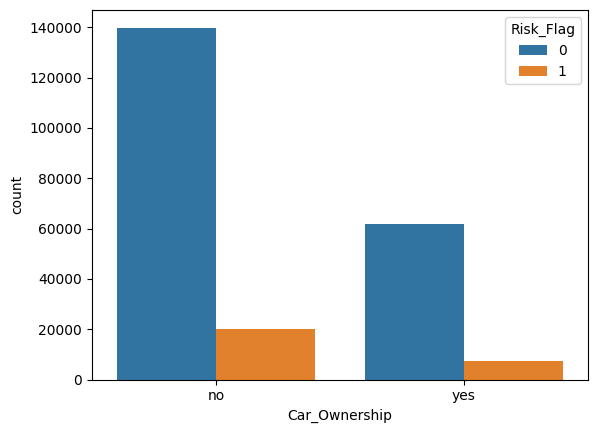

In [145]:
# STEP 12: CREATING A COUNT PLOT FOR THE RISK FLAG/ Car Ownership RELATIONSHIP
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=dset)

<Axes: xlabel='Married/Single', ylabel='count'>

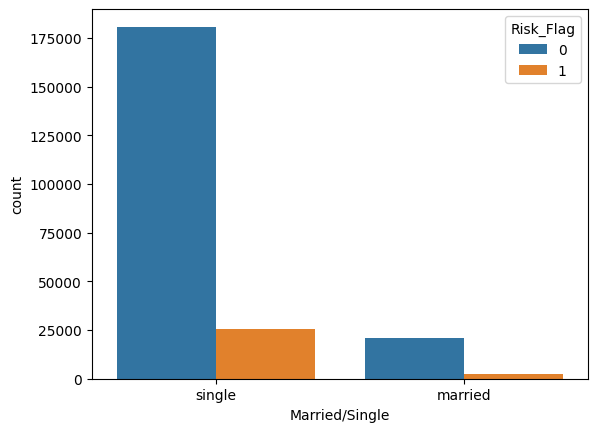

In [146]:
# STEP 13: CREATING A COUNT PLOT FOR THE RISK FLAG/ Married/Single RELATIONSHIP

sns.countplot(x='Married/Single', hue='Risk_Flag', data=dset)

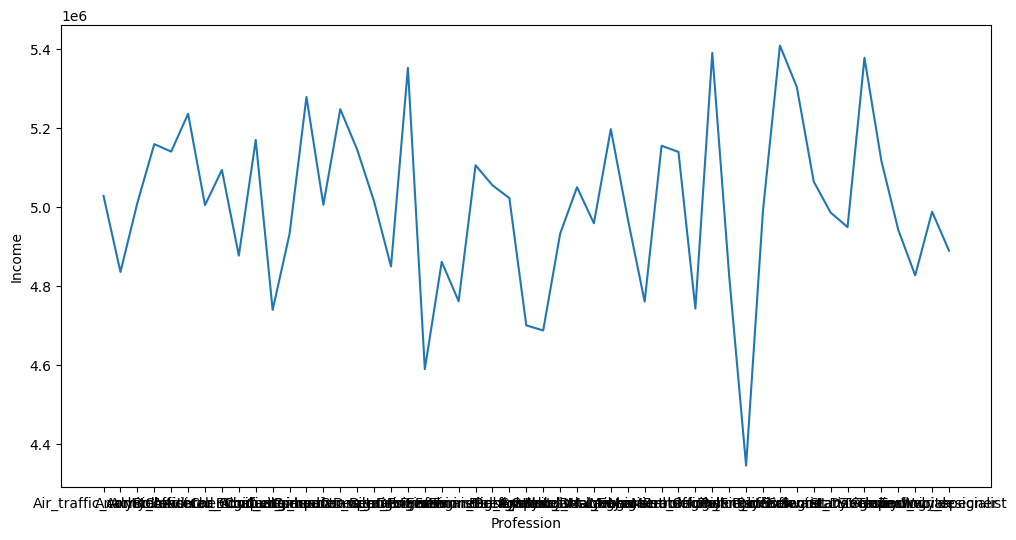

In [147]:
# STEP 14: GROUPING PROFESSIONS BY INCOME MEAN
grouped_data = dset.groupby('Profession')['Income'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x="Profession", y="Income")
plt.xticks(rotation=0)
plt.show()

In [148]:
dset['CITY'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Tiruppur', 'Jamnagar', 'Kota[6]',
       'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]', 'Kollam',
       'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal', 'Sirsa',
       'Secunderabad', 'Ahmedabad', 'Ajmer', 'Ongole', 'Miryalaguda',
       'Ambattur', 'Indore', 'Pondicherry', 'Shimoga', 'Chennai',
       'Gulbarga', 'Khammam', 'Saharanpur', 'Gopalpur', 'Amravati',
       'Udupi', 'Howrah', 'Aurangabad[39]', 'Hospet', 'Shimla', 'Khandwa',
       'Bidhannagar', 'Bellary', 'Danapur', 'Purnia[26]', 'Bijapur',
       'Patiala', 'Malda', 'Sagar', 'Durgapur', 'Junagadh', 'Singrauli',
       'Agartala', 'Thanjavur', 'Hindupur', 'Naihati', 'North_Dumdum',
       'Panchkula', 'Anantapur', 'Serampore', 'Bathinda', 'Nadiad',
       'Kanpur', 'Haridwar', 'Berhampur', 'Jamshedpur', 'Hyderabad',
       'Bidar', 'Kottayam', 'Solapur', 'Suryapet', 'Aizawl', 'Asansol',
       'Deoghar', 'Eluru[25]', 'Ulhasnag

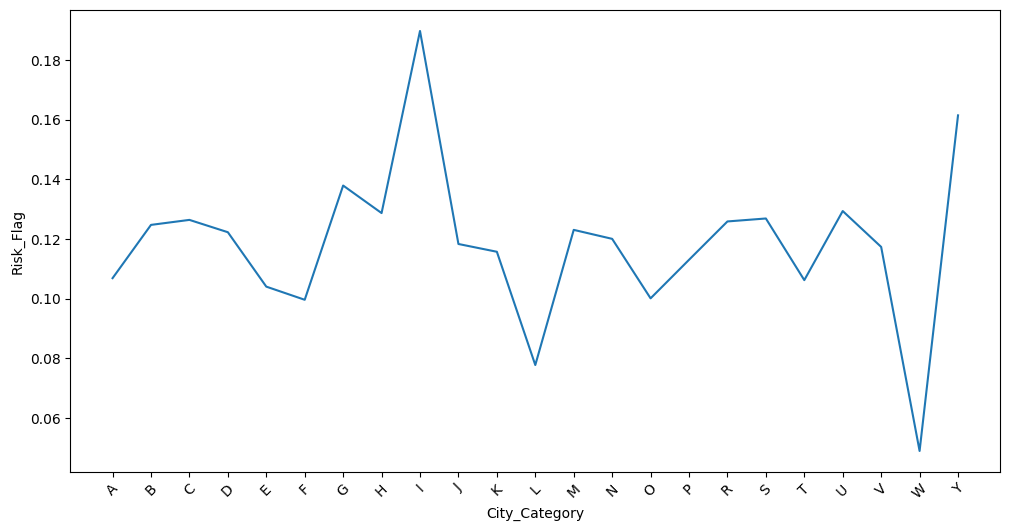

In [149]:
# STEP 15: GENERAL CITY TO RISK FACTOR DISTRIBUTION
def categorize_city(city):
    first_letter = city[0].upper()  # Get the first letter of the city name
    return first_letter

# Create a new column for the city category
dset['City_Category'] = dset['CITY'].apply(categorize_city)

# Group by the new city category
grouped_data = dset.groupby('City_Category')['Risk_Flag'].mean().reset_index()

plt.figure(figsize=(12, 6))  # Adjust width and height as needed
sns.lineplot(data=grouped_data, x="City_Category", y="Risk_Flag")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

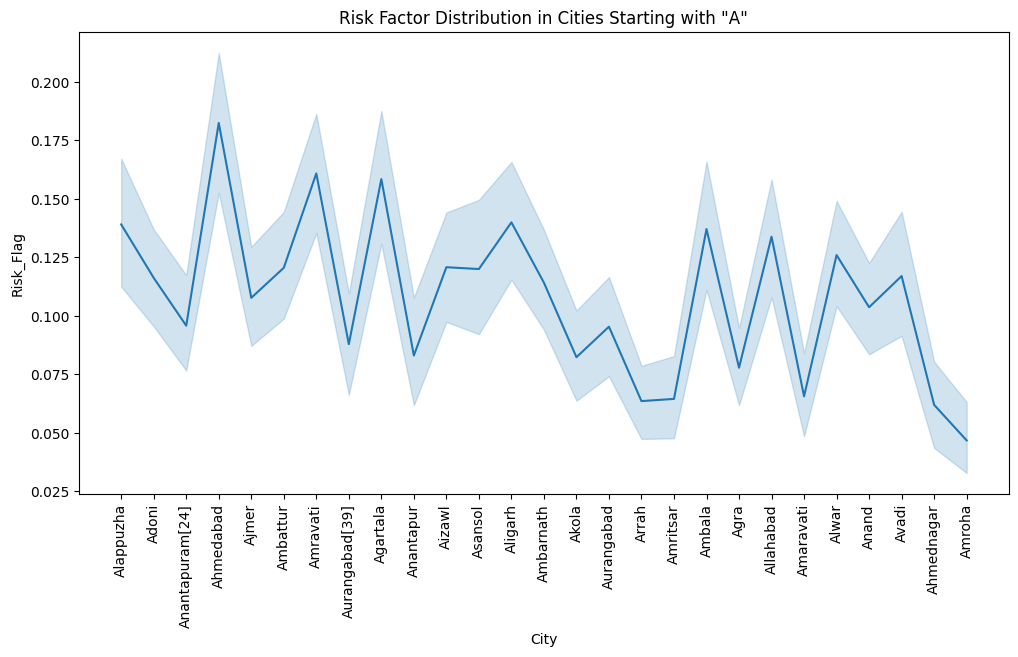

In [150]:
# STEP 16: SPECIFIC CITY LETTER TO RISK FACTOR DISTRIBUTION
cities_starting_with_A = dset[dset['CITY'].str.startswith('A')]

# Plotting
plt.figure(figsize=(12, 6))  # Adjust width and height as needed
sns.lineplot(data=cities_starting_with_A, x="CITY", y="Risk_Flag")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('City')
plt.ylabel('Risk_Flag')
plt.title('Risk Factor Distribution in Cities Starting with "A"')
plt.show()

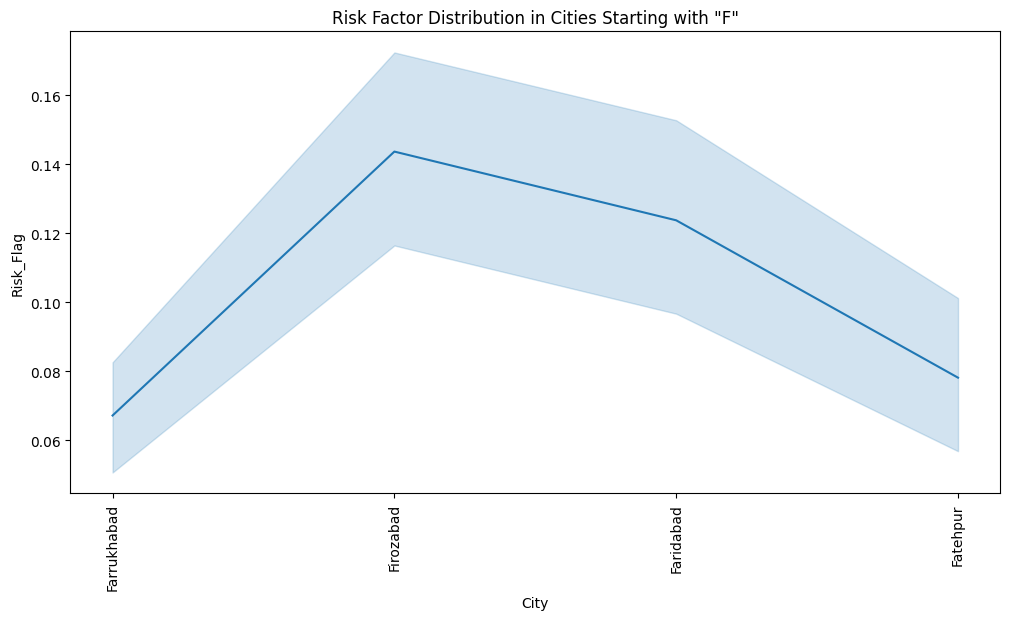

In [151]:
#ANOTHER EXAMPLE FOR CITIES STARTING WITH F
cities_starting_with_U = dset[dset['CITY'].str.startswith('F')]

# Plotting
plt.figure(figsize=(12, 6))  # Adjust width and height as needed
sns.lineplot(data=cities_starting_with_U, x="CITY", y="Risk_Flag")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('City')
plt.ylabel('Risk_Flag')
plt.title('Risk Factor Distribution in Cities Starting with "F"')
plt.show()

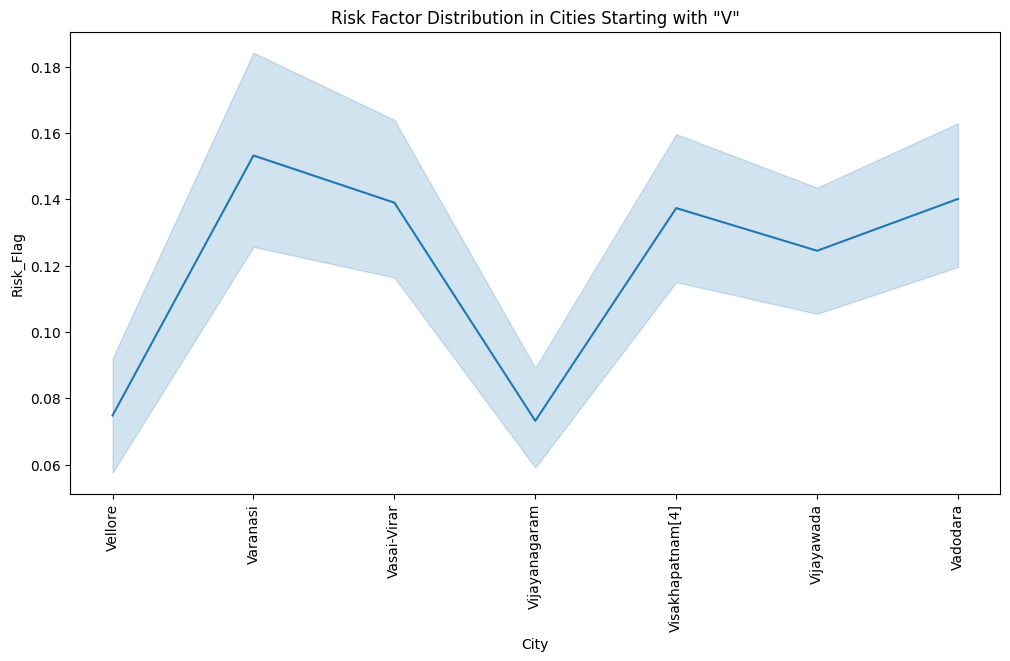

In [152]:
#ANOTHER EXAMPLE FOR CITIES STARTING WITH V
cities_starting_with_V = dset[dset['CITY'].str.startswith('V')]

# Plotting
plt.figure(figsize=(12, 6))  # Adjust width and height as needed
sns.lineplot(data=cities_starting_with_V, x="CITY", y="Risk_Flag")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('City')
plt.ylabel('Risk_Flag')
plt.title('Risk Factor Distribution in Cities Starting with "V"')
plt.show()

In [153]:
#STEP 17: ENCODING CATGORICAL VARIABLES INTO NUMERICAL REPRESENTATIONS

enc = LabelEncoder()
catCols = ['Married/Single','House_Ownership','Car_Ownership']
for cols in catCols:
    dset[cols] = enc.fit_transform(dset[cols])

<Axes: >

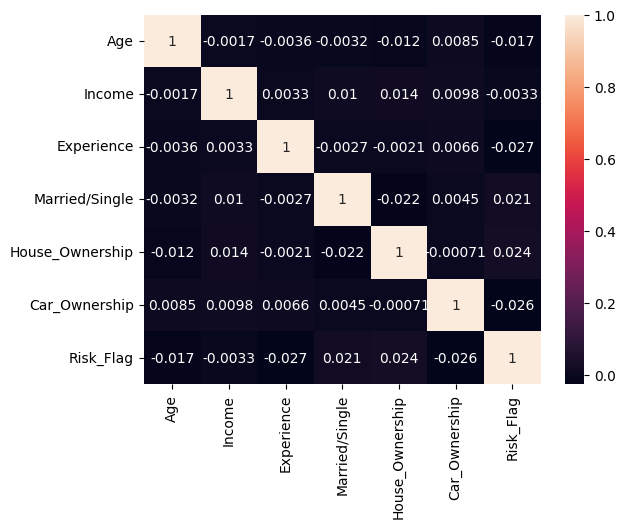

In [154]:
#STEP 18: CREATING THE CORRELATION HEAT MAP

numeric_cols = ['Age', 'Income', 'Experience','Married/Single','House_Ownership','Car_Ownership','Risk_Flag']  # Assuming numerical columns

# Create the heatmap
sns.heatmap(dset[numeric_cols].corr(),annot=True)

In [155]:
#STEP 19: SPLITTING THE DATA
X=dset[['Income', 'Age', 'Experience', 'Married/Single','House_Ownership', 'Car_Ownership']]
y=dset['Risk_Flag']

In [156]:
#STEP 20: LISTING TRAIN AND TEST VALUES
train_x, test_x, train_y, test_y=train_test_split(X, y, test_size=0.30, random_state=0)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(160567, 6)
(68815, 6)
(160567,)
(68815,)


In [157]:
#STEP 21: USING THE Logistic REGRESSION MODEL TO CALCULATE DATASET ACCURACY
model=LogisticRegression().fit(train_x, train_y)
pred=model.predict(test_x)
print(accuracy_score(test_y, pred))
print(classification_report(test_y,pred))

0.8790525321514204
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     60492
           1       0.00      0.00      0.00      8323

    accuracy                           0.88     68815
   macro avg       0.44      0.50      0.47     68815
weighted avg       0.77      0.88      0.82     68815



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
#STEP 22: USING THE XGB MODEL TO CALCULATE DATASET ACCURACY
model = XGB.XGBClassifier()

# Train the model
model.fit(train_x, train_y)

# Make predictions on the test set
pred = model.predict(test_x)
print(accuracy_score(test_y, pred))
print(classification_report(test_y,pred))

0.8853738283804403
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     60492
           1       0.65      0.11      0.20      8323

    accuracy                           0.89     68815
   macro avg       0.77      0.55      0.57     68815
weighted avg       0.86      0.89      0.85     68815

